In [1]:
%run auxStandardStructure.ipynb

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('all_releases.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 2)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (6080, 16) y: (6080,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=10
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 4256 X Test set: 1824
y Train set: 4256 y Test set: 1824
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 10
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,CountClassCoupled,CountDeclMethod,CountDeclMethodAll,CountClassDerived,CountLineCode,SumCyclomatic,PercentLackOfCohesion,MaxInheritanceTree,class_frequency,will_change,number_of_changes,release
count,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000
mean,3.212966,7.791957,23.463453,0.526702,79.394446,36.223553,32.550014,2.168478,3.288195,0.346893,5.302684,7.056283
std,4.262742,10.075647,27.670783,4.996340,127.175324,29.731811,35.272832,1.145320,2.113989,0.476004,3.552433,2.272490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,4.000000,0.000000,13.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000
50%,2.000000,4.000000,12.000000,0.000000,37.000000,33.000000,19.000000,2.000000,3.000000,0.000000,6.000000,7.000000
75%,4.000000,10.000000,38.000000,0.000000,89.000000,62.000000,68.000000,3.000000,5.000000,1.000000,8.000000,9.000000
max,40.000000,125.000000,210.000000,166.000000,1586.000000,99.000000,100.000000,7.000000,10.000000,1.000000,10.000000,10.000000


0
False    2427
True     1829
Name: 0, dtype: int64

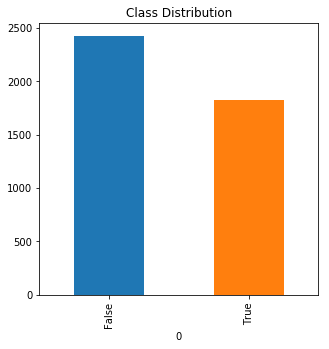

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.16,0.6,0.45,0.73,0.17,0.55,0.25,0.95,0.16,0.58,0.45,0.71,0.21,0.54,0.23
1,0.16,1.0,0.22,0.1,0.16,-0.034,0.24,0.075,0.16,0.94,0.22,0.087,0.16,-0.062,0.24,0.069
2,0.6,0.22,1.0,0.59,0.88,0.13,0.73,0.27,0.55,0.22,0.96,0.58,0.85,0.16,0.7,0.26
3,0.45,0.1,0.59,1.0,0.53,0.74,0.43,0.23,0.44,0.1,0.58,0.93,0.53,0.71,0.43,0.23
4,0.73,0.16,0.88,0.53,1.0,0.12,0.71,0.31,0.68,0.15,0.85,0.52,0.97,0.15,0.69,0.29
5,0.17,-0.034,0.13,0.74,0.12,1.0,0.076,0.085,0.2,-0.029,0.13,0.67,0.13,0.9,0.096,0.082
6,0.55,0.24,0.73,0.43,0.71,0.076,1.0,0.32,0.54,0.24,0.71,0.39,0.7,0.032,0.95,0.29
7,0.25,0.075,0.27,0.23,0.31,0.085,0.32,1.0,0.25,0.065,0.26,0.18,0.31,0.029,0.31,0.83
8,0.95,0.16,0.55,0.44,0.68,0.2,0.54,0.25,1.0,0.17,0.56,0.42,0.71,0.19,0.56,0.24
9,0.16,0.94,0.22,0.1,0.15,-0.029,0.24,0.065,0.17,1.0,0.22,0.084,0.15,-0.056,0.24,0.07


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7153410240841934
2 of KFold 10
ROC AUC score: 0.7407744721041625
3 of KFold 10
ROC AUC score: 0.7106186332051542
4 of KFold 10
ROC AUC score: 0.7168252040747487
5 of KFold 10
ROC AUC score: 0.7223571476759091
6 of KFold 10
ROC AUC score: 0.7044457936989813
7 of KFold 10
ROC AUC score: 0.6901436956081765
8 of KFold 10
ROC AUC score: 0.7123018561170573
9 of KFold 10
ROC AUC score: 0.7246308088334914
10 of KFold 10
ROC AUC score: 0.6727817636908546

CROSS VALIDANTION SUMMARY:
Mean: 0.7110220399092728
Std deviation: 0.017873143222693854

TEST SET:
F1-Score(micro): 0.7319078947368421
F1-Score(macro): 0.7263911874462214
F1-Score(weighted): 0.7306085930197461
F1-Score(None): [0.76524244 0.68753994]
Accuracy: 0.7319078947368421
Sensitivity: 0.6617466174661747
Specificity: 0.7883283877349159
Confusion Matrix: [0.7883283877349159, 0.66]
ROC AUC score: 0.7250375026005452
Wall time: 540 ms


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7715037441813398
2 of KFold 10
ROC AUC score: 0.7572016460905349
3 of KFold 10
ROC AUC score: 0.7243810294812116
4 of KFold 10
ROC AUC score: 0.785198677730554
5 of KFold 10
ROC AUC score: 0.7900897254267017
6 of KFold 10
ROC AUC score: 0.7947783849423193
7 of KFold 10
ROC AUC score: 0.7633744855967077
8 of KFold 10
ROC AUC score: 0.7705482545273902
9 of KFold 10
ROC AUC score: 0.7856771891794246
10 of KFold 10
ROC AUC score: 0.8074879665788757

CROSS VALIDANTION SUMMARY:
Mean: 0.7750241103735059
Std deviation: 0.02222300134060627

TEST SET:
F1-Score(micro): 0.7554824561403509
F1-Score(macro): 0.7532368732368733
F1-Score(weighted): 0.7557921917132443
F1-Score(None): [0.77677678 0.72969697]
Accuracy: 0.7554824561403509
Sensitivity: 0.7404674046740467
Specificity: 0.7675568743818002
Confusion Matrix: [0.7675568743818002, 0.74]
ROC AUC score: 0.7540121395279235
Wall time: 521 ms


In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7687715037441812
2 of KFold 10
ROC AUC score: 0.8132969034608379
3 of KFold 10
ROC AUC score: 0.7735950887134857
4 of KFold 10
ROC AUC score: 0.7872900222626998
5 of KFold 10
ROC AUC score: 0.7942049517641504
6 of KFold 10
ROC AUC score: 0.747554476151926
7 of KFold 10
ROC AUC score: 0.7674222492073128
8 of KFold 10
ROC AUC score: 0.7465564738292011
9 of KFold 10
ROC AUC score: 0.8172673079528517
10 of KFold 10
ROC AUC score: 0.7476841340477705

CROSS VALIDANTION SUMMARY:
Mean: 0.7763643111134418
Std deviation: 0.024821517377187935

TEST SET:
F1-Score(micro): 0.7976973684210527
F1-Score(macro): 0.7942232604980972
F1-Score(weighted): 0.7971256797755032
F1-Score(None): [0.8209607  0.76748582]
Accuracy: 0.7976973684210527
Sensitivity: 0.7490774907749077
Specificity: 0.8367952522255193
Confusion Matrix: [0.8367952522255193, 0.75]
ROC AUC score: 0.7929363715002136
Wall time: 7.05 s


In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7838494231936856
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7962288335694528
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7783849423193686
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7873574849895433
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7914727113269917
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7914052486001484
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7648249342238413
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7850788059431875
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8172673079528517
10 of KFold 10
ROC AUC score: 0.8075333757151939

CROSS VALIDANTION SUMMARY:
Mean: 0.7903403067834265
Std deviation: 0.013894003610004323

TEST SET:
F1-Score(micro): 0.799890350877193
F1-Score(macro): 0.7952358880969788
F1-Score(weighted): 0.798587101298733
F1-Score(None): [0.82610767 0.76436411]
Accuracy: 0.799890350877193
Sensitivity: 0.7281672816728167
Specificity: 0.857566765578635
Confusion Matrix: [0.857566765578635, 0.73]
ROC AUC score: 0.7928670236257258
Wall time: 41.7 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 3658 3658


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7149901984807645
2 of KFold 10
ROC AUC score: 0.6920061981587823
3 of KFold 10
ROC AUC score: 0.707070707070707
4 of KFold 10
ROC AUC score: 0.7523602033405955
5 of KFold 10
ROC AUC score: 0.6670216650438169
6 of KFold 10
ROC AUC score: 0.6924858466289243
7 of KFold 10
ROC AUC score: 0.7313432835820896
8 of KFold 10
ROC AUC score: 0.7037856060371757
9 of KFold 10
ROC AUC score: 0.6843334972946385
10 of KFold 10
ROC AUC score: 0.729946524064171

CROSS VALIDANTION SUMMARY:
Mean: 0.7075343729701665
Std deviation: 0.02407389431909009

TEST SET:
F1-Score(micro): 0.7308114035087719
F1-Score(macro): 0.7255307822604397
F1-Score(weighted): 0.7296634423678301
F1-Score(None): [0.76360135 0.68746022]
Accuracy: 0.7308114035087719
Sensitivity: 0.6642066420664207
Specificity: 0.7843719090009891
Confusion Matrix: [0.7843719090009891, 0.66]
ROC AUC score: 0.7242892755337048
Wall time: 496 ms


In [16]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7798946336682187
2 of KFold 10
ROC AUC score: 0.7795096162610518
3 of KFold 10
ROC AUC score: 0.7959956709956709
4 of KFold 10
ROC AUC score: 0.7998366013071896
5 of KFold 10
ROC AUC score: 0.780550146056475
6 of KFold 10
ROC AUC score: 0.7672735460627894
7 of KFold 10
ROC AUC score: 0.7763455450022615
8 of KFold 10
ROC AUC score: 0.7584820462066618
9 of KFold 10
ROC AUC score: 0.7659554845056568
10 of KFold 10
ROC AUC score: 0.7772521596051007

CROSS VALIDANTION SUMMARY:
Mean: 0.7781095449671076
Std deviation: 0.012071898473613743

TEST SET:
F1-Score(micro): 0.7456140350877193
F1-Score(macro): 0.7426423723453426
F1-Score(weighted): 0.7456443581769271
F1-Score(None): [0.77029703 0.71498771]
Accuracy: 0.7456140350877193
Sensitivity: 0.7158671586715867
Specificity: 0.7695351137487636
Confusion Matrix: [0.7695351137487636, 0.72]
ROC AUC score: 0.7427011362101751
Wall time: 300 ms


In [17]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7922690517030139
2 of KFold 10
ROC AUC score: 0.7703035274815423
3 of KFold 10
ROC AUC score: 0.768488455988456
4 of KFold 10
ROC AUC score: 0.7874001452432824
5 of KFold 10
ROC AUC score: 0.7672529211295034
6 of KFold 10
ROC AUC score: 0.7855120946989191
7 of KFold 10
ROC AUC score: 0.7628222523744912
8 of KFold 10
ROC AUC score: 0.7672965700677327
9 of KFold 10
ROC AUC score: 0.7776377274963109
10 of KFold 10
ROC AUC score: 0.788358700123406

CROSS VALIDANTION SUMMARY:
Mean: 0.7767341446306658
Std deviation: 0.010246669915512341

TEST SET:
F1-Score(micro): 0.7856359649122807
F1-Score(macro): 0.7822636116536155
F1-Score(weighted): 0.7852051356413497
F1-Score(None): [0.80936129 0.75516594]
Accuracy: 0.7856359649122807
Sensitivity: 0.7416974169741697
Specificity: 0.820969337289812
Confusion Matrix: [0.820969337289812, 0.74]
ROC AUC score: 0.7813333771319908
Wall time: 5.19 s


In [18]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.764242832639059
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7867559930726461
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8059163059163059
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8053740014524329
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7437013145082766
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7786284096757592
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8221166892808685
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7970494541180837
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7573782587309394
10 of KFold 10
ROC AUC score: 0.8017276840806252

CROSS VALIDANTION SUMMARY:
Mean: 0.7862890943474997
Std deviation: 0.02362564330188425

TEST SET:
F1-Score(micro): 0.8026315789473685
F1-Score(macro): 0.7972932925022227
F1-Score(weighted): 0.800864173299989
F1-Score(None): [0.83018868 0.76439791]
Accuracy: 0.8026315789473685
Sensitivity: 0.7183271832718328
Specificity: 0.8704253214638972
Confusion Matrix: [0.8704253214638972, 0.72]
ROC AUC score: 0.794376252367865
Wall time: 34.8 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

Resampling dataset using Edited Nearest Neighbour (ENN)...
... DONE!
X and Y ENN: 3344 3344


In [20]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.6976787580235856
2 of KFold 10
ROC AUC score: 0.6959807433945364
3 of KFold 10
ROC AUC score: 0.7379494341784845
4 of KFold 10
ROC AUC score: 0.6972222222222223
5 of KFold 10
ROC AUC score: 0.7429078014184397
6 of KFold 10
ROC AUC score: 0.7020174181457391
7 of KFold 10
ROC AUC score: 0.6653254615876358
8 of KFold 10
ROC AUC score: 0.7025084293601096
9 of KFold 10
ROC AUC score: 0.7590923895342526
10 of KFold 10
ROC AUC score: 0.6794340924775707

CROSS VALIDANTION SUMMARY:
Mean: 0.7080116750342577
Std deviation: 0.027921642335061805

TEST SET:
F1-Score(micro): 0.7253289473684211
F1-Score(macro): 0.719676860757785
F1-Score(weighted): 0.723997760946611
F1-Score(None): [0.75948152 0.6798722 ]
Accuracy: 0.725328947368421
Sensitivity: 0.6543665436654367
Specificity: 0.7823936696340257
Confusion Matrix: [0.7823936696340257, 0.65]
ROC AUC score: 0.7183801066497312
Wall time: 412 ms


In [21]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7925809822361547
2 of KFold 10
ROC AUC score: 0.7484512613822959
3 of KFold 10
ROC AUC score: 0.7671178914195674
4 of KFold 10
ROC AUC score: 0.7669354838709677
5 of KFold 10
ROC AUC score: 0.7814987697206544
6 of KFold 10
ROC AUC score: 0.7494763532135376
7 of KFold 10
ROC AUC score: 0.7521340202308878
8 of KFold 10
ROC AUC score: 0.7601059690985216
9 of KFold 10
ROC AUC score: 0.7569391669380813
10 of KFold 10
ROC AUC score: 0.7361973775017253

CROSS VALIDANTION SUMMARY:
Mean: 0.7611437275612394
Std deviation: 0.01578398111937756

TEST SET:
F1-Score(micro): 0.7554824561403509
F1-Score(macro): 0.7532368732368733
F1-Score(weighted): 0.7557921917132443
F1-Score(None): [0.77677678 0.72969697]
Accuracy: 0.7554824561403509
Sensitivity: 0.7404674046740467
Specificity: 0.7675568743818002
Confusion Matrix: [0.7675568743818002, 0.74]
ROC AUC score: 0.7540121395279235
Wall time: 290 ms


In [22]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7850052246603971
2 of KFold 10
ROC AUC score: 0.7603933422898941
3 of KFold 10
ROC AUC score: 0.7879064603924939
4 of KFold 10
ROC AUC score: 0.7553763440860214
5 of KFold 10
ROC AUC score: 0.797456216529165
6 of KFold 10
ROC AUC score: 0.7562929482232755
7 of KFold 10
ROC AUC score: 0.7619862369796563
8 of KFold 10
ROC AUC score: 0.7309088888065508
9 of KFold 10
ROC AUC score: 0.7628198168856077
10 of KFold 10
ROC AUC score: 0.7489648033126294

CROSS VALIDANTION SUMMARY:
Mean: 0.7647110282165691
Std deviation: 0.01897446190570591

TEST SET:
F1-Score(micro): 0.7867324561403509
F1-Score(macro): 0.7832561251093975
F1-Score(weighted): 0.7862358374216432
F1-Score(None): [0.8107056  0.75580665]
Accuracy: 0.7867324561403509
Sensitivity: 0.7404674046740467
Specificity: 0.8239366963402571
Confusion Matrix: [0.8239366963402571, 0.74]
ROC AUC score: 0.782202050507152
Wall time: 5.05 s


In [23]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7437117480220929
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7855836692043588
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7814962039822375
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7886200716845879
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7860761325806919
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7682908903832728
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7666679201293575
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7537515284004594
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8398110954293779
10 of KFold 10
ROC AUC score: 0.7389579020013803

CROSS VALIDANTION SUMMARY:
Mean: 0.7752967161817818
Std deviation: 0.027396934616096647

TEST SET:
F1-Score(micro): 0.7894736842105263
F1-Score(macro): 0.7831282325664348
F1-Score(weighted): 0.7871551538021082
F1-Score(None): [0.82022472 0.74603175]
Accuracy: 0.7894736842105263
Sensitivity: 0.6937269372693727
Specificity: 0.8664688427299704
Confusion Matrix: [0.8664688427299704, 0.69]
ROC AUC score: 0.7800978899996714
Wall time: 32 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [24]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

Resampling dataset using Tomek's Link (TL)...
... DONE!
X and Y TL: 4000 4000


In [25]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7104519774011299
2 of KFold 10
ROC AUC score: 0.7436760505915953
3 of KFold 10
ROC AUC score: 0.7085385878489326
4 of KFold 10
ROC AUC score: 0.7087642687504788
5 of KFold 10
ROC AUC score: 0.7226940316112291
6 of KFold 10
ROC AUC score: 0.6888471177944862
7 of KFold 10
ROC AUC score: 0.6917067153247154
8 of KFold 10
ROC AUC score: 0.7475713104588673
9 of KFold 10
ROC AUC score: 0.6949669284828441
10 of KFold 10
ROC AUC score: 0.6886161840379376

CROSS VALIDANTION SUMMARY:
Mean: 0.7105833172302216
Std deviation: 0.02042702170312283

TEST SET:
F1-Score(micro): 0.7297149122807018
F1-Score(macro): 0.7240650473862753
F1-Score(weighted): 0.7283511517889436
F1-Score(None): [0.76354916 0.68458093]
Accuracy: 0.7297149122807017
Sensitivity: 0.6580565805658056
Specificity: 0.7873392680514342
Confusion Matrix: [0.7873392680514342, 0.66]
ROC AUC score: 0.7226979243086199
Wall time: 530 ms


In [26]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.757678479712378
2 of KFold 10
ROC AUC score: 0.8179824561403508
3 of KFold 10
ROC AUC score: 0.7355295566502462
4 of KFold 10
ROC AUC score: 0.7781225261114941
5 of KFold 10
ROC AUC score: 0.7541479908783518
6 of KFold 10
ROC AUC score: 0.725187969924812
7 of KFold 10
ROC AUC score: 0.7481945979286063
8 of KFold 10
ROC AUC score: 0.7886523356758991
9 of KFold 10
ROC AUC score: 0.7480880529144273
10 of KFold 10
ROC AUC score: 0.7867520936333368

CROSS VALIDANTION SUMMARY:
Mean: 0.7640336059569902
Std deviation: 0.02682517429645105

TEST SET:
F1-Score(micro): 0.7489035087719298
F1-Score(macro): 0.7462650119366537
F1-Score(weighted): 0.7490737343742058
F1-Score(None): [0.7721393  0.72039072]
Accuracy: 0.7489035087719298
Sensitivity: 0.7257072570725708
Specificity: 0.7675568743818002
Confusion Matrix: [0.7675568743818002, 0.73]
ROC AUC score: 0.7466320657271854
Wall time: 390 ms


In [27]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7555598356445814
2 of KFold 10
ROC AUC score: 0.8034475724194206
3 of KFold 10
ROC AUC score: 0.7684729064039408
4 of KFold 10
ROC AUC score: 0.7664266196787456
5 of KFold 10
ROC AUC score: 0.8031899557023406
6 of KFold 10
ROC AUC score: 0.7473684210526317
7 of KFold 10
ROC AUC score: 0.7349207165069004
8 of KFold 10
ROC AUC score: 0.7677242662257131
9 of KFold 10
ROC AUC score: 0.774183546920215
10 of KFold 10
ROC AUC score: 0.7463298355362727

CROSS VALIDANTION SUMMARY:
Mean: 0.7667623676090761
Std deviation: 0.0215981764149112

TEST SET:
F1-Score(micro): 0.7927631578947368
F1-Score(macro): 0.7891120507399577
F1-Score(weighted): 0.7921242141426506
F1-Score(None): [0.81686047 0.76136364]
Accuracy: 0.7927631578947368
Sensitivity: 0.7416974169741697
Specificity: 0.8338278931750742
Confusion Matrix: [0.8338278931750742, 0.74]
ROC AUC score: 0.787762655074622
Wall time: 6.13 s


In [28]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7797765793528506
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8186964504283966
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7841748768472907
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7962920401440282
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7773714974705774
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7824561403508773
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.773997070237208
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8053431169904919
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7826581231914016
10 of KFold 10
ROC AUC score: 0.757176369690243

CROSS VALIDANTION SUMMARY:
Mean: 0.7857942264703366
Std deviation: 0.016321240370481632

TEST SET:
F1-Score(micro): 0.7735745614035088
F1-Score(macro): 0.7679082591363293
F1-Score(weighted): 0.7718448480798434
F1-Score(None): [0.80417259 0.73164392]
Accuracy: 0.7735745614035088
Sensitivity: 0.6924969249692496
Specificity: 0.8387734915924827
Confusion Matrix: [0.8387734915924827, 0.69]
ROC AUC score: 0.7656352082808662
Wall time: 38.9 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Oversampling

In [29]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

Resampling dataset using Random OverSampling (ROS)...
X and Y ROS: 4854 4854


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7160493827160495
2 of KFold 10
ROC AUC score: 0.7489711934156379
3 of KFold 10
ROC AUC score: 0.6975308641975309
4 of KFold 10
ROC AUC score: 0.7160493827160493
5 of KFold 10
ROC AUC score: 0.7222222222222222
6 of KFold 10
ROC AUC score: 0.7037037037037037
7 of KFold 10
ROC AUC score: 0.7037037037037037
8 of KFold 10
ROC AUC score: 0.6983471074380165
9 of KFold 10
ROC AUC score: 0.7169421487603306
10 of KFold 10
ROC AUC score: 0.7148760330578513

CROSS VALIDANTION SUMMARY:
Mean: 0.7138395741931095
Std deviation: 0.014270348522547934

TEST SET:
F1-Score(micro): 0.7346491228070176
F1-Score(macro): 0.7291457015085097
F1-Score(weighted): 0.7333367684973734
F1-Score(None): [0.76775432 0.69053708]
Accuracy: 0.7346491228070176
Sensitivity: 0.6642066420664207
Specificity: 0.7912957467853611
Confusion Matrix: [0.7912957467853611, 0.66]
ROC AUC score: 0.7277511944258908
Wall time: 550 ms


In [31]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7901234567901234
2 of KFold 10
ROC AUC score: 0.831275720164609
3 of KFold 10
ROC AUC score: 0.8065843621399176
4 of KFold 10
ROC AUC score: 0.8497942386831276
5 of KFold 10
ROC AUC score: 0.874485596707819
6 of KFold 10
ROC AUC score: 0.816872427983539
7 of KFold 10
ROC AUC score: 0.8148148148148149
8 of KFold 10
ROC AUC score: 0.847107438016529
9 of KFold 10
ROC AUC score: 0.9194214876033059
10 of KFold 10
ROC AUC score: 0.9028925619834711

CROSS VALIDANTION SUMMARY:
Mean: 0.8453372104887258
Std deviation: 0.040204046649299045

TEST SET:
F1-Score(micro): 0.7483552631578947
F1-Score(macro): 0.7465721143236992
F1-Score(weighted): 0.748879718697364
F1-Score(None): [0.76783005 0.72531418]
Accuracy: 0.7483552631578947
Sensitivity: 0.7453874538745388
Specificity: 0.7507418397626113
Confusion Matrix: [0.7507418397626113, 0.75]
ROC AUC score: 0.7480646468185751
Wall time: 350 ms


In [32]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.8189300411522633
2 of KFold 10
ROC AUC score: 0.8333333333333335
3 of KFold 10
ROC AUC score: 0.8168724279835391
4 of KFold 10
ROC AUC score: 0.8168724279835391
5 of KFold 10
ROC AUC score: 0.8539094650205762
6 of KFold 10
ROC AUC score: 0.8148148148148148
7 of KFold 10
ROC AUC score: 0.8209876543209876
8 of KFold 10
ROC AUC score: 0.8429752066115703
9 of KFold 10
ROC AUC score: 0.9421487603305786
10 of KFold 10
ROC AUC score: 0.8946280991735538

CROSS VALIDANTION SUMMARY:
Mean: 0.8455472230724755
Std deviation: 0.039833561623140085

TEST SET:
F1-Score(micro): 0.7905701754385964
F1-Score(macro): 0.7891056312108943
F1-Score(weighted): 0.7910133927706642
F1-Score(None): [0.80668016 0.7715311 ]
Accuracy: 0.7905701754385965
Sensitivity: 0.7933579335793358
Specificity: 0.7883283877349159
Confusion Matrix: [0.7883283877349159, 0.79]
ROC AUC score: 0.7908431606571258
Wall time: 7.26 s


In [33]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8004115226337448
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8045267489711934
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7921810699588476
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8045267489711934
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8189300411522634
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7880658436213991
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8065843621399176
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8243801652892563
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8491735537190083
10 of KFold 10
ROC AUC score: 0.8078512396694215

CROSS VALIDANTION SUMMARY:
Mean: 0.8096631296126244
Std deviation: 0.016693484872183886

TEST SET:
F1-Score(micro): 0.8092105263157895
F1-Score(macro): 0.8074583674583675
F1-Score(weighted): 0.8094522033995718
F1-Score(None): [0.82582583 0.78909091]
Accuracy: 0.8092105263157895
Sensitivity: 0.8007380073800738
Specificity: 0.8160237388724035
Confusion Matrix: [0.8160237388724035, 0.8]
ROC AUC score: 0.8083808731262386
Wall time: 45.8 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [34]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

Resampling dataset using SMOTE (SMO)...
X and Y SMO: 4854 4854


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7181069958847737
2 of KFold 10
ROC AUC score: 0.7489711934156378
3 of KFold 10
ROC AUC score: 0.6975308641975309
4 of KFold 10
ROC AUC score: 0.7181069958847737
5 of KFold 10
ROC AUC score: 0.7283950617283951
6 of KFold 10
ROC AUC score: 0.7160493827160493
7 of KFold 10
ROC AUC score: 0.7016460905349794
8 of KFold 10
ROC AUC score: 0.6942148760330579
9 of KFold 10
ROC AUC score: 0.7293388429752067
10 of KFold 10
ROC AUC score: 0.7148760330578513

CROSS VALIDANTION SUMMARY:
Mean: 0.7167236336428255
Std deviation: 0.01563747214245556

TEST SET:
F1-Score(micro): 0.7308114035087719
F1-Score(macro): 0.7254452933229225
F1-Score(weighted): 0.7296119200554645
F1-Score(None): [0.76382876 0.68706182]
Accuracy: 0.7308114035087719
Sensitivity: 0.6629766297662977
Specificity: 0.7853610286844708
Confusion Matrix: [0.7853610286844708, 0.66]
ROC AUC score: 0.7241688292253843
Wall time: 560 ms


In [36]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7777777777777778
2 of KFold 10
ROC AUC score: 0.7880658436213992
3 of KFold 10
ROC AUC score: 0.7901234567901235
4 of KFold 10
ROC AUC score: 0.7880658436213992
5 of KFold 10
ROC AUC score: 0.8045267489711935
6 of KFold 10
ROC AUC score: 0.7880658436213992
7 of KFold 10
ROC AUC score: 0.7798353909465019
8 of KFold 10
ROC AUC score: 0.8119834710743802
9 of KFold 10
ROC AUC score: 0.8842975206611571
10 of KFold 10
ROC AUC score: 0.8553719008264464

CROSS VALIDANTION SUMMARY:
Mean: 0.8068113797911778
Std deviation: 0.03361178732134246

TEST SET:
F1-Score(micro): 0.7554824561403509
F1-Score(macro): 0.7542723476647077
F1-Score(weighted): 0.7561442342129683
F1-Score(None): [0.77151639 0.7370283 ]
Accuracy: 0.7554824561403509
Sensitivity: 0.7687576875768758
Specificity: 0.744807121661721
Confusion Matrix: [0.744807121661721, 0.77]
ROC AUC score: 0.7567824046192985
Wall time: 425 ms


In [37]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7921810699588476
2 of KFold 10
ROC AUC score: 0.8106995884773662
3 of KFold 10
ROC AUC score: 0.7901234567901234
4 of KFold 10
ROC AUC score: 0.7962962962962963
5 of KFold 10
ROC AUC score: 0.8148148148148149
6 of KFold 10
ROC AUC score: 0.7716049382716048
7 of KFold 10
ROC AUC score: 0.7757201646090535
8 of KFold 10
ROC AUC score: 0.8305785123966942
9 of KFold 10
ROC AUC score: 0.921487603305785
10 of KFold 10
ROC AUC score: 0.8801652892561984

CROSS VALIDANTION SUMMARY:
Mean: 0.8183671734176784
Std deviation: 0.04544158365198192

TEST SET:
F1-Score(micro): 0.7889254385964913
F1-Score(macro): 0.7883513047661042
F1-Score(weighted): 0.789547920538911
F1-Score(None): [0.79937467 0.77732794]
Accuracy: 0.7889254385964912
Sensitivity: 0.8265682656826568
Specificity: 0.7586547972304649
Confusion Matrix: [0.7586547972304649, 0.83]
ROC AUC score: 0.7926115314565609
Wall time: 9.04 s


In [38]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7983539094650206
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8004115226337447
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8004115226337447
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7983539094650205
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8065843621399177
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7962962962962963
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.794238683127572
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8491735537190083
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8388429752066116
10 of KFold 10
ROC AUC score: 0.8223140495867768

CROSS VALIDANTION SUMMARY:
Mean: 0.8104980784273712
Std deviation: 0.01848961156547151

TEST SET:
F1-Score(micro): 0.8064692982456141
F1-Score(macro): 0.804671286522582
F1-Score(weighted): 0.8067056083577839
F1-Score(None): [0.82341171 0.78593087]
Accuracy: 0.8064692982456141
Sensitivity: 0.7970479704797048
Specificity: 0.8140454995054401
Confusion Matrix: [0.8140454995054401, 0.8]
ROC AUC score: 0.8055467349925723
Wall time: 46.3 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [39]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampling dataset using ADASYN (ADA)...
X and Y ADA: 4668 4668


In [40]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7195884773662551
2 of KFold 10
ROC AUC score: 0.7470421810699589
3 of KFold 10
ROC AUC score: 0.7067258230452675
4 of KFold 10
ROC AUC score: 0.7206055261610818
5 of KFold 10
ROC AUC score: 0.7374154908877132
6 of KFold 10
ROC AUC score: 0.7027851263962375
7 of KFold 10
ROC AUC score: 0.6902281746031745
8 of KFold 10
ROC AUC score: 0.6810064935064936
9 of KFold 10
ROC AUC score: 0.5793978748524203
10 of KFold 10
ROC AUC score: 0.5379833234946871

CROSS VALIDANTION SUMMARY:
Mean: 0.6822778491383289
Std deviation: 0.06525637680838267

TEST SET:
F1-Score(micro): 0.7319078947368421
F1-Score(macro): 0.7267332010815033
F1-Score(weighted): 0.7308152303394997
F1-Score(None): [0.76433735 0.68912905]
Accuracy: 0.7319078947368421
Sensitivity: 0.6666666666666666
Specificity: 0.7843719090009891
Confusion Matrix: [0.7843719090009891, 0.67]
ROC AUC score: 0.7255192878338278
Wall time: 516 ms


In [41]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7889711934156378
2 of KFold 10
ROC AUC score: 0.7631540270429159
3 of KFold 10
ROC AUC score: 0.7866971634332744
4 of KFold 10
ROC AUC score: 0.7791280864197531
5 of KFold 10
ROC AUC score: 0.8046920928865373
6 of KFold 10
ROC AUC score: 0.7822328777189889
7 of KFold 10
ROC AUC score: 0.7909869194591417
8 of KFold 10
ROC AUC score: 0.7759924734356553
9 of KFold 10
ROC AUC score: 0.8152486717827626
10 of KFold 10
ROC AUC score: 0.7783906434474617

CROSS VALIDANTION SUMMARY:
Mean: 0.7865494149042128
Std deviation: 0.014062182423055125

TEST SET:
F1-Score(micro): 0.7445175438596491
F1-Score(macro): 0.7439745536037015
F1-Score(weighted): 0.7452544592070071
F1-Score(None): [0.7557652  0.73218391]
Accuracy: 0.7445175438596491
Sensitivity: 0.7835178351783518
Specificity: 0.7131552917903067
Confusion Matrix: [0.7131552917903067, 0.78]
ROC AUC score: 0.7483365634843292
Wall time: 385 ms


In [42]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 10
ROC AUC score: 0.7874074074074076
2 of KFold 10
ROC AUC score: 0.8031580687830687
3 of KFold 10
ROC AUC score: 0.7976833480305703
4 of KFold 10
ROC AUC score: 0.7842904908877132
5 of KFold 10
ROC AUC score: 0.817037771898883
6 of KFold 10
ROC AUC score: 0.7698871987066432
7 of KFold 10
ROC AUC score: 0.7741769547325104
8 of KFold 10
ROC AUC score: 0.786987160566706
9 of KFold 10
ROC AUC score: 0.8789846517119244
10 of KFold 10
ROC AUC score: 0.8496531877213696

CROSS VALIDANTION SUMMARY:
Mean: 0.8049266240446796
Std deviation: 0.03303820588610189

TEST SET:
F1-Score(micro): 0.7856359649122807
F1-Score(macro): 0.7846884448583853
F1-Score(weighted): 0.7862389322193049
F1-Score(None): [0.79897172 0.77040517]
Accuracy: 0.7856359649122807
Sensitivity: 0.8068880688806888
Specificity: 0.7685459940652819
Confusion Matrix: [0.7685459940652819, 0.81]
ROC AUC score: 0.7877170314729853
Wall time: 8.02 s


In [43]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)

Wall time: 0 ns
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7725925925925925
2 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7755364491475603
3 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7940917107583774
4 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7729552469135803
5 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8026344797178131
6 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7717702821869489
7 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.7530404908877132
8 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.8074822904368358
9 of KFold 10


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.6332091204250295
10 of KFold 10
ROC AUC score: 0.6137839433293978

CROSS VALIDANTION SUMMARY:
Mean: 0.7497096606395848
Std deviation: 0.06510409388916631

TEST SET:
F1-Score(micro): 0.7922149122807017
F1-Score(macro): 0.7893422338506713
F1-Score(weighted): 0.7920126109828122
F1-Score(None): [0.81394207 0.7647424 ]
Accuracy: 0.7922149122807017
Sensitivity: 0.7576875768757687
Specificity: 0.8199802176063303
Confusion Matrix: [0.8199802176063303, 0.76]
ROC AUC score: 0.7888338972410495
Wall time: 44.9 s


C:\Users\cristiano.melo\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
